<a href="https://colab.research.google.com/github/VuQuangDanHN/HamK_Basic_programing_Github_assignment/blob/main/GroupHCDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis & Visualization - Project Work (Team HCDA)

## Introduction & Objective

We selected dataset from Kaggle: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023 on 15 Nov 2023. The information this dataset was most likely gathered by scraping job postings from ai-jobs.net.

We aim to use this dataset to analyze salaries for various data science roles, factoring in key variables like experience, location, and job specifics. This offers insights into potential earnings across different domains that influence data science salaries. For example, it can be used to address the following questions:

1. Which are the top 10 jobs with the highest salary for juniors in 2023?
2. What is the mean salary of each job title in small-sized companies in the US?
3. How does the average income for the Analytics Lead job vary by experience level?
4. What are the top 5 poppular job titles from 2022 to 2023?

For those embarking on the data science journey, these observations are like having a crystal ball. It enables informed decision-making and strategic job hunting, thereby setting realistic salary expectations.

# 1. Data Preprocessing

**Activities:**
- Select a dataset to work on and understand your dataset. Your activities may include tasks such as viewing a random sample of data, getting the total number of rows and columns.
- Check to see if your dataset contains any missing values and get the percentage of the missing data. Within the context of your dataset, decide what to do with the missing values and take necessary steps.
Identify and drop duplicate values from the dataset.
- Separate one of your columns in the dataset that contains continuous numeric data into appropriate bins. You may use cut or qcut function.
- Identify any outliers within your dataset. If the dataset does not include any outlier, you can randomly mess up some portion of your data.
Decide what to do with the outliers.

**Assessment:**
- Understanding the Dataset (1 point): Demonstrates a basic understanding of the selected dataset by performing tasks like viewing a random sample, determining the total number of rows and columns.
- Handling Missing Values (1 point): Identifies and addresses missing values effectively, providing a clear strategy for handling them.
- Handling Duplicates (1 point): Detects and removes duplicate values from the dataset, ensuring data cleanliness.

### Data Exploration

In [51]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', DeprecationWarning)

In [52]:
# Load raw data
from google.colab import data_table
url = 'https://raw.githubusercontent.com/hiephamk/Data_Analysis/main/ds_salaries.csv'
salary = pd.read_csv(url,sep = ',')

In [53]:
# Preview the first 10 lines of the loaded data
salary.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [54]:
# View a random dataset of data
sample = salary.sample(5)
sample

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3093,2022,EN,FT,Machine Learning Engineer,30000,USD,30000,GB,100,GB,L
3632,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
2915,2022,EX,FT,Machine Learning Scientist,180000,USD,180000,US,100,US,S
1141,2023,SE,FT,Data Scientist,126500,USD,126500,US,0,US,M
2206,2022,EN,FT,3D Computer Vision Researcher,50000,USD,50000,US,100,CR,S


Now we need to know how many rows and columns are there in the data set, what variables it has and the data types of the variables.

In [55]:
# Viewing data type and getting the total number of rows and columns
print(salary.info())
salary.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


(3755, 11)

As we can see from the above data frame information, there are 3755 rows, 11 columns, and no missing values in this dataset since all fields has 3755 non-null entries.

However, we could check again to assure if there are some missing values in the data set.

In [56]:
# Check missing values
missing_values = salary.isnull().sum()
print(missing_values)

# Calculate the missing percentage
total_values = np.product(salary.shape)
percentage = (missing_values / total_values) * 100
print(percentage)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64


As per the above result, we now can ensure that our data set has no missing value.

### Data Transformation

#### Unnecessary data drop

Firstly, out of 3,755 observations in the dataset, there are only over 700 data values from other nations besides the US. Since this data may not be meaningfully contributing to useful analysis, we decide to exclude these data and retain only the data values from the US.

In [57]:
# Filter data values to keep the US country only
df_salary1 = salary[salary['company_location'] == 'US']
df_salary1.shape

(3040, 11)

Now that we only have one country in the data, we do not need 2 features "company_location" and "employee_residence" because all employees who work for a company based in the US also live in the US. So we will drop them for a cleaner data set.

Besides, the "salary" and "salary_currency" features will also be removed. We saw that there are 3 features relevant to salary: "salary", "salary_currency", and "salary_in_usa". However, we will primarily focus on the "salary_in_usd" feature because it provides a standardized currency for easy comparisons.

In [58]:
# Drop 2 columns 'company_location' and 'employee_residence'
df_salary2 = df_salary1.drop(columns=['company_location', 'employee_residence'])
df_salary2.shape

(3040, 9)

In [59]:
# Drop 2 columns: 'salary' and 'salary_currency'
df_salary3 = df_salary2.drop(['salary','salary_currency'], axis=1)
df_salary3.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
1,2023,MI,CT,ML Engineer,30000,100,S
2,2023,MI,CT,ML Engineer,25500,100,S
5,2023,SE,FT,Applied Scientist,222200,0,L
6,2023,SE,FT,Applied Scientist,136000,0,L
9,2023,SE,FT,Data Scientist,147100,0,M


In [60]:
# Check the number of rows and columns of the latest dataset
df_salary3.shape

(3040, 7)

As observed, there are limited number of data values for the year 2020, 2021 ( 131 out of 3,040 observations) in the latest data set. These data may not contribute significantly to our analytic, so we will exclude it in the final data set.

In [61]:
# Filter data without values of years 2020 and 2021
df_salary = df_salary3[(df_salary3['work_year'] != 2020) & (df_salary3['work_year'] != 2021)]
df_salary.shape

(2909, 7)

Finally, our data set now has 2909 rows and 7 columns in total.

#### Duplicated values

We are going to identify and remove duplicated values (if any) in order to smooth our data set.

In [62]:
# Check duplicate values
dup_value = df_salary.duplicated()

# Find the number of duplicate values
dup_value_count = dup_value.value_counts()
dup_value_count

False    1798
True     1111
dtype: int64

The result shows that there are 1111 duplicated entries in our final dataset.

Before dropping them, we will display some of these duplicated values to see if they are valid to assure that we don't make any mistake here.

In [63]:
# Show some rows of duplicate values to investigate
df_salary[dup_value].head(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
115,2023,SE,FT,Data Scientist,150000,0,M
123,2023,SE,FT,Analytics Engineer,289800,0,M
153,2023,MI,FT,Data Engineer,100000,100,M
154,2023,MI,FT,Data Engineer,70000,100,M
160,2023,SE,FT,Data Engineer,115000,0,M
163,2023,SE,FT,Applied Scientist,309400,0,L
164,2023,SE,FT,Applied Scientist,159100,0,L
167,2023,MI,FT,Data Engineer,162500,0,M
168,2023,MI,FT,Data Engineer,130000,0,M
171,2023,SE,FT,Data Engineer,145000,0,M


After manually examining the above duplicated values, we found that each of the duplicates had unique values in the "salary_in_usd" feature. Hence, we concluded that all of these duplicate entries are invalid observations, and none of them will be removed.

#### Distinct values

In [64]:
unique_counts = df_salary.nunique(axis=0)
unique_values_list = []
for col_name in unique_counts.index:
        values_get = df_salary[col_name].unique()
        unique_values_list.append(values_get)
df_distinct = pd.DataFrame({'Column_name': unique_counts.index, 'Distinct_values_count': unique_counts.values, 'Values_range': unique_values_list})
df_distinct


,Column_name,Distinct_values_count,Values_range
0,work_year,2,"[2023, 2022]"
1,experience_level,4,"[MI, SE, EN, EX]"
2,employment_type,4,"[CT, FT, PT, FL]"
3,job_title,61,"[ML Engineer, Applied Scientist, Data Scientis..."
4,salary_in_usd,645,"[30000, 25500, 222200, 136000, 147100, 90700, ..."
5,remote_ratio,3,"[100, 0, 50]"
6,company_size,3,"[S, L, M]"


#### Replace values
According to the above distinct values and source inspection, we can decribe the distinct values of several fields as following:

**1. Experience Level:** 4 unique values
- EN: Entry-level / Junior
- MI: Mid-level / Intermediate
- SE: Senior-level / Expert
- EX: Executive-level / Director

**2. Employee Type:** 4 categories
- PT: Part-time
- FT: Full-time
- CT: Contract
- FL: Freelance

**3. Remote Ratio:** 3 numerical values
- 0: Office work
- 50: Partial remote
- 100: Fully remote

**4. Company Size:** 3 unique values
- S: Small-sized company
- M: Medium-sized company
- L: Large-sized company

Now let's replace these abbreviations with the descriptions for easy understanding.

In [65]:
# Replace the abbreviations
df_salary['experience_level'] = df_salary['experience_level'].replace(['EN','MI','SE','EX'], ['Entry-level','Mid-level','Senior','Executive'])
df_salary['employment_type'] = df_salary['employment_type'].replace(['FT','PT','CT','FL'], ['Full-time','Part-time','Contract','Freelance'])
df_salary['remote_ratio'] = df_salary['remote_ratio'].replace([0,50,100], ['Office work','Partial remote','Fully remote'])
df_salary['company_size'] = df_salary['company_size'].replace(['S', 'M', 'L'], ['Small', 'Medium', 'Large'])

In [66]:
# Show 5 first rows of the final data set
df_salary.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
1,2023,Mid-level,Contract,ML Engineer,30000,Fully remote,Small
2,2023,Mid-level,Contract,ML Engineer,25500,Fully remote,Small
5,2023,Senior,Full-time,Applied Scientist,222200,Office work,Large
6,2023,Senior,Full-time,Applied Scientist,136000,Office work,Large
9,2023,Senior,Full-time,Data Scientist,147100,Office work,Medium


#### Discretization & Bining

We decide using "salary_in_usd" feature to do bining since this column contains numerical values representing the salaries in USD and by grouping these values into discrete categories, it will be useful to have an overview on the salary range.

Before creating the salary bin, we need to know its minimum and maximum amount so that we can determine the first and last value of the bin.

In [67]:
# Get the minimum salary
min_salary = df_salary['salary_in_usd'].min()
min_salary

12000

In [68]:
# Get the maximum salary
max_salary = df_salary['salary_in_usd'].max()
max_salary

405000

Then, we start creating the salary bin using cut function.

In [69]:
# Divide the 'salary_in_usd' column into 5 bins with labels
bins = [12000,50000,100000,150000,200000,410000]
labels = ['12k-50k','50k-100k','100k-150k','150k-200k','200k-410k']
salary_range_bins = pd.cut(df_salary['salary_in_usd'], bins = bins, labels = labels, right = False)
salary_range_bins

1         12k-50k
2         12k-50k
5       200k-410k
6       100k-150k
9       100k-150k
          ...    
3479    100k-150k
3482    100k-150k
3486    100k-150k
3490    100k-150k
3493    100k-150k
Name: salary_in_usd, Length: 2909, dtype: category
Categories (5, object): ['12k-50k' < '50k-100k' < '100k-150k' < '150k-200k' < '200k-410k']

In [70]:
# Let's count the values of each bin
pd.value_counts(salary_range_bins)

100k-150k    1119
150k-200k     840
200k-410k     545
50k-100k      383
12k-50k        22
Name: salary_in_usd, dtype: int64

#### Outliers

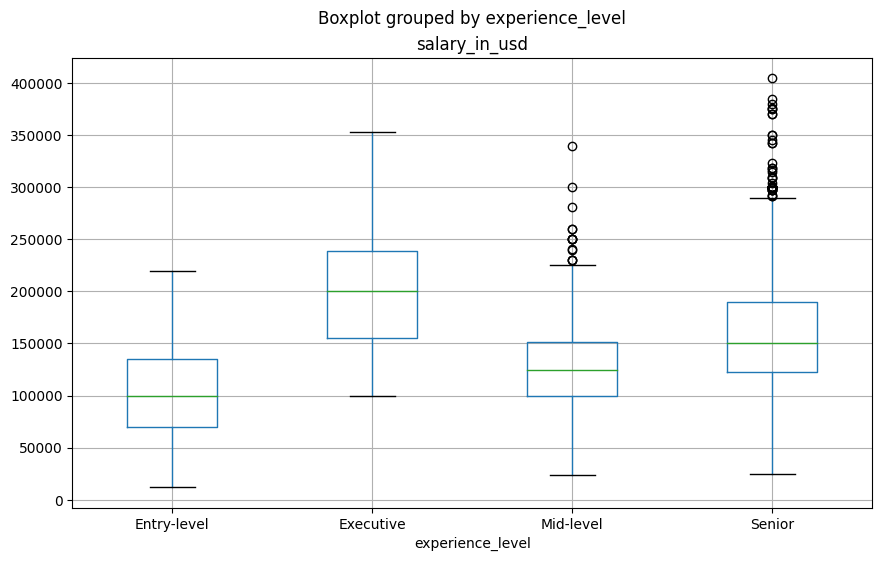

In [71]:
# Define outliers by using Boxplot
df_salary.boxplot(column='salary_in_usd', by='experience_level', figsize=(10,6))
plt.show()

In [72]:
# Show the salary of executive level from highest to lowest
exe_level = df_salary[df_salary['experience_level'] == 'Executive']
salary_of_exe = exe_level.sort_values(by='salary_in_usd', ascending=False)
salary_of_exe

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
478,2023,Executive,Full-time,Director of Data Science,353200,Office work,Medium
228,2023,Executive,Full-time,Head of Data,329500,Office work,Medium
3410,2022,Executive,Full-time,Data Engineer,324000,Fully remote,Medium
1396,2023,Executive,Full-time,Head of Data Science,314100,Office work,Medium
1932,2022,Executive,Full-time,Data Engineer,310000,Fully remote,Medium
...,...,...,...,...,...,...,...
3275,2022,Executive,Full-time,Data Analyst,110000,Fully remote,Medium
1375,2023,Executive,Full-time,Data Engineer,110000,Office work,Medium
275,2023,Executive,Full-time,Data Engineer,110000,Office work,Medium
798,2023,Executive,Full-time,Data Engineer,106500,Office work,Medium


In [73]:
# Show the highest salary entry
highest_salary = df_salary[df_salary['salary_in_usd'] == 405000]
highest_salary.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
3463,2022,Senior,Full-time,Data Analytics Lead,405000,Fully remote,Large


We saw that the salary range for Executive level is from 100000 to 353200 with the highest one in Medium-sized company and Office work, while the highest salary at 405000 is for Senior level at a Large-sized company and Fully remote.

In [74]:
# Define outliers by Z-scores
from scipy import stats
z_scores = stats.zscore(df_salary['salary_in_usd'])
outlier_threshold = 3
outliers_Z = df_salary[abs(z_scores) > outlier_threshold]
#outliers_Z

In [75]:
outliers_Z.shape

(21, 7)

In [76]:
# Define outliers by IQR
Q1 = df_salary['salary_in_usd'].quantile(0.25)
Q3 = df_salary['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df_salary[(df_salary['salary_in_usd'] < lower_bound) | (df_salary['salary_in_usd'] > upper_bound)]
#outliers_iqr

In [77]:
outliers_iqr.shape

(58, 7)

In [78]:
# use IQR method to calculate outliers
q25 = np.percentile(df_salary.salary_in_usd, 25)
q75 = np.percentile(df_salary.salary_in_usd, 75)
IQR = q75 - q25
IQR # print IQR values

70000.0

In [79]:
# calculate Upper/Lower to identify outliers
limit_iqr = 1.5*IQR
lower_iqr = q25 - limit_iqr
upper_iqr = q75 + limit_iqr
print(lower_iqr)
print(upper_iqr)

10000.0
290000.0


In [80]:
ouliers_items = df_salary[(df_salary['salary_in_usd'] < lower_iqr) | (df_salary['salary_in_usd'] > upper_iqr)]
ouliers_items.shape

(58, 7)

In [81]:
a = np.std(ouliers_items.salary_in_usd)
a

28585.1211744236

In [82]:
b = np.mean(ouliers_items.salary_in_usd)
b

320224.8275862069

In [83]:
non_ouliers_items = df_salary[(df_salary['salary_in_usd'] > lower_iqr) & (df_salary['salary_in_usd'] < upper_iqr)]

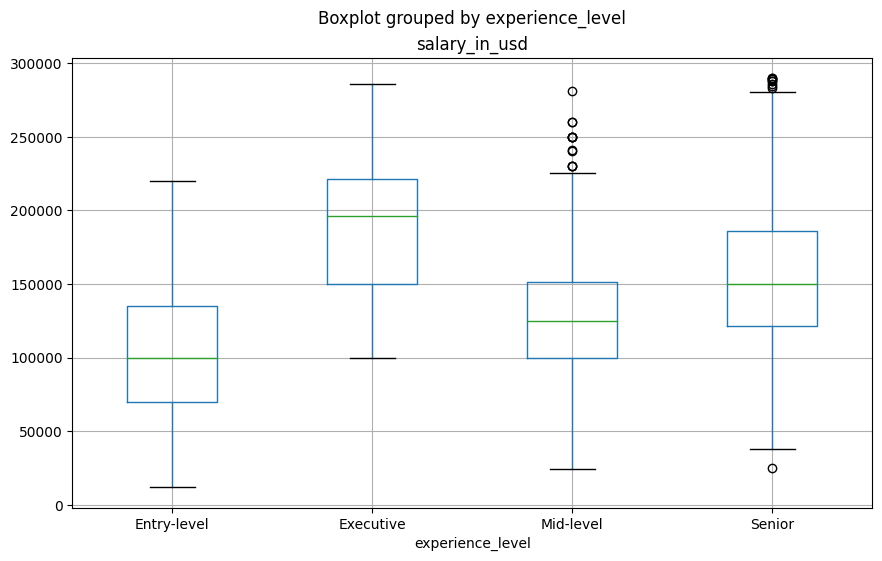

In [84]:
import matplotlib.pyplot as plt
non_ouliers_items.boxplot(column='salary_in_usd', by='experience_level', figsize=(10,6))
plt.show()

#2. Data Objects & Attribute Types

To get started, we created a function that prints the data attributes as a list for a clean and nice appearance.

In [85]:
def Data_print_as_List(input_data):
  for i, col in enumerate(input_data):
    print(i,col)

### Identify and print nominal attributes


Because nominal attributes are typically the most common in our final dataframe, we should apply exclusion methods.

In [86]:
# Print norminal attributes
print("List of Nominal Atributes:\n")
Nominal_col = df_salary.loc[:, ~df_salary.columns.isin(['salary_in_usd', 'company_size', 'experience_level'])] # exclusing other columns
Data_print_as_List(Nominal_col)

List of Nominal Atributes:

0 work_year
1 employment_type
2 job_title
3 remote_ratio


###  Identify and print binary attributes

A binary attribute can only have two possible values (0 or 1, true or false, on or off...). To define binary attributes, we can manually examine the data frame or use code to list the columns automatically. In our instance, we chose code to ensure the most accurate outcome.

In [87]:
# List binary attribulte columns which has values as (0,1) or (True,False)
Binary_col = df_salary.columns[df_salary.isin([0, 1]).all()]

# Print the result
if not Binary_col.empty:
    print("List of Binary Atributes:\n")
    Data_print_as_List(Binary_col)
else:
    print("There are no binary columns in the data frame.")

There are no binary columns in the data frame.


### Identify and print ordinal attributes

We observed that the "experience_level" column may be an ordinal attribute because it indicates the range of experience levels.

Additionally, the "company_size" column may be an ordinal attribute since it reflects the company's size (small, medium, or large).

In [88]:
# Get ordinal attributes
print("List of Ordinal Atributes:\n")
Ordinal_col = df_salary[['experience_level','company_size']]
Data_print_as_List(Ordinal_col)

List of Ordinal Atributes:

0 experience_level
1 company_size


Because the values of these two columns are of the string type, they will be returned in alphabetical order, preventing us from sorting them in the right manner.

So now we need to adjust the order for the values of those columns.

In [89]:
# Set order for "experience_level" values, assending == True
ordinal_order = ['Entry-level','Mid-level','Senior','Executive']

# Print the order and its type
df_salary['experience_level'] = df_salary['experience_level'].astype(pd.CategoricalDtype(categories=ordinal_order, ordered=True))
df_salary.experience_level.dtype

CategoricalDtype(categories=['Entry-level', 'Mid-level', 'Senior', 'Executive'], ordered=True)

In [90]:
# Set order for "company_size" values, assending == True
ordinal_order = ['Small','Medium','Large']

# Print the order & its type
df_salary['company_size'] = df_salary['company_size'].astype(pd.CategoricalDtype(categories=ordinal_order, ordered=True))
df_salary.experience_level.dtype

CategoricalDtype(categories=['Entry-level', 'Mid-level', 'Senior', 'Executive'], ordered=True)

###  Identify and print numerical attributes

The "salary_in_usd" has an int64 type and could be calculated, hence it must be a numerical attribute.


In [91]:
# Print the numberical attributes
print("Numerical Atribute:\n")
Numerical_columns = df_salary[['salary_in_usd']]
Data_print_as_List(Numerical_columns)


Numerical Atribute:

0 salary_in_usd


In [92]:
Numerical_columns.describe()

,salary_in_usd
count,2909.000000
mean,152500.606050
std,54658.328851
min,12000.000000
25%,115000.000000
50%,145000.000000
75%,185000.000000
max,405000.000000


#3. Statistics & Visualization

**Assessment:**
- Mean and Median (0.5 points): Correctly calculates the mean and median values for appropriate columns.
- Standard Deviation and Variance (0.5 points): Accurately computes the standard deviation and variance of data.
- Minimum and Maximum (0.25 points): Finds the minimum and maximum values.
- Sum and Product (0.25 points): Accurately calculates the sum and product of data.

In [95]:
# Check DataFrame columns
print(df_salary.columns)


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'remote_ratio', 'company_size'],
      dtype='object')


Mean Salary: 69146.21
Median Salary: 68721.35
Standard Deviation: 15505.10
Variance: 240408220.24
Minimum Salary: 24923.08
Maximum Salary: 107466.51
Total Salary: 6914621.17


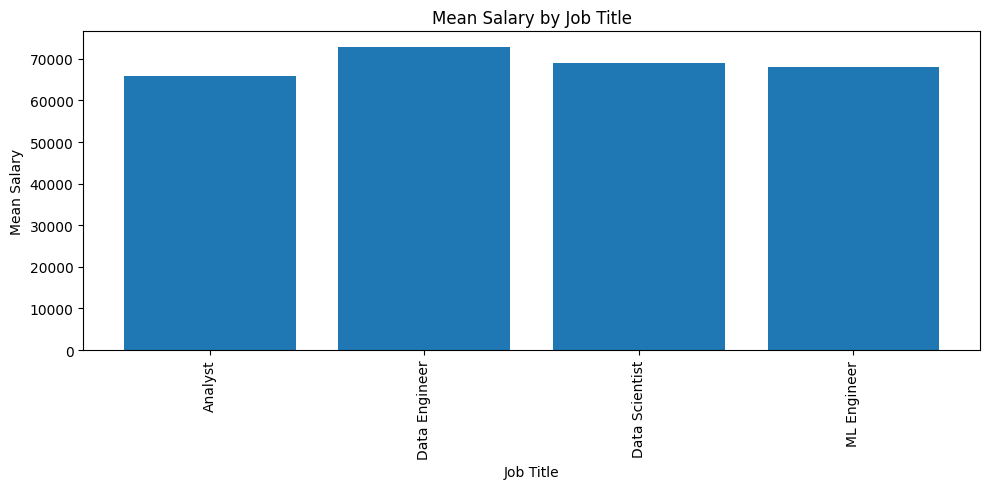

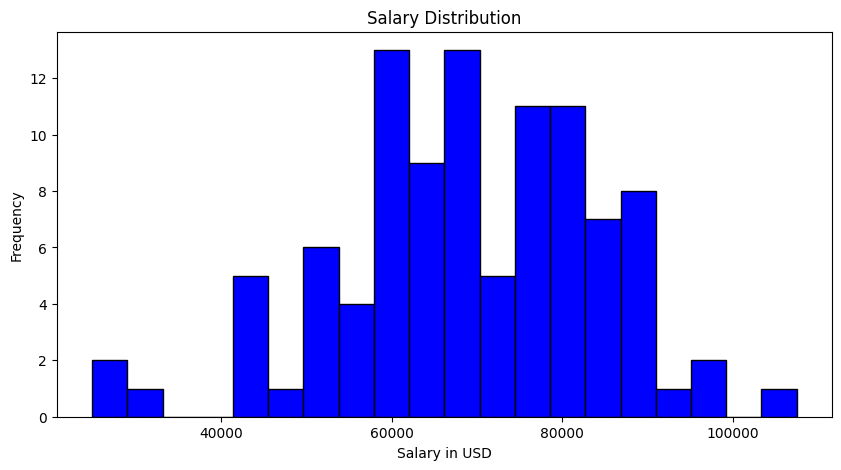

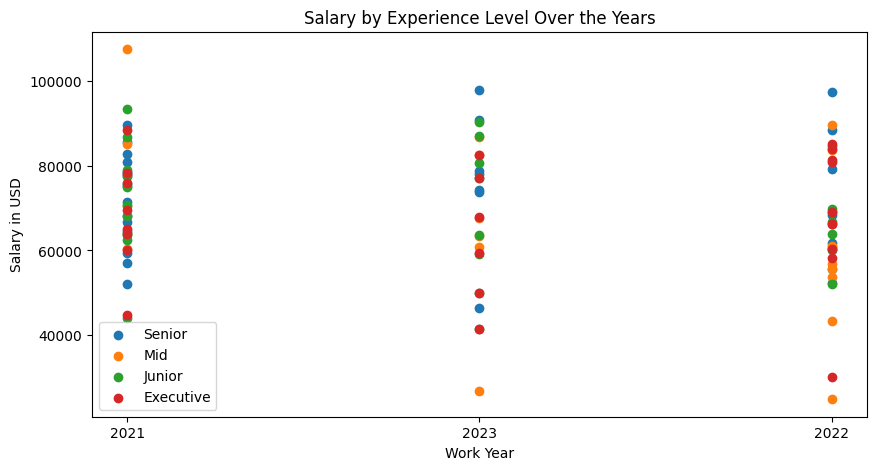

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_salary is already defined and loaded into the environment
# Here we simulate a DataFrame with random data for demonstration purposes
# In your actual code, df_salary would be the DataFrame you've already prepared
np.random.seed(0)
df_salary = pd.DataFrame({
    'work_year': np.random.choice(['2021', '2022', '2023'], size=100),
    'experience_level': np.random.choice(['Junior', 'Mid', 'Senior', 'Executive'], size=100),
    'employment_type': np.random.choice(['FT', 'PT', 'Contract', 'Freelance'], size=100),
    'job_title': np.random.choice(['Data Scientist', 'Data Engineer', 'ML Engineer', 'Analyst'], size=100),
    'salary_in_usd': np.random.normal(70000, 15000, size=100),
    'remote_ratio': np.random.choice([0, 50, 100], size=100),
    'company_size': np.random.choice(['Small', 'Medium', 'Large'], size=100)
})

# Basic Statistics with NumPy
mean_salary = np.mean(df_salary['salary_in_usd'])
median_salary = np.median(df_salary['salary_in_usd'])
std_dev_salary = np.std(df_salary['salary_in_usd'], ddof=1)
variance_salary = np.var(df_salary['salary_in_usd'], ddof=1)
min_salary = np.min(df_salary['salary_in_usd'])
max_salary = np.max(df_salary['salary_in_usd'])
total_salary = np.sum(df_salary['salary_in_usd'])

# Display basic statistics
basic_stats = {
    "Mean Salary": mean_salary,
    "Median Salary": median_salary,
    "Standard Deviation": std_dev_salary,
    "Variance": variance_salary,
    "Minimum Salary": min_salary,
    "Maximum Salary": max_salary,
    "Total Salary": total_salary
}

# Print out basic statistics with explanations
for stat, value in basic_stats.items():
    print(f"{stat}: {value:.2f}")

# Visualization with Matplotlib

# Example: Bar Chart for Mean Salary by Job Title
job_titles = df_salary['job_title'].unique()
mean_salaries_by_title = df_salary.groupby('job_title')['salary_in_usd'].mean()

plt.figure(figsize=(10, 5))
plt.bar(mean_salaries_by_title.index, mean_salaries_by_title.values)
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Job Title')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Histogram for Salary Distribution
plt.figure(figsize=(10, 5))
plt.hist(df_salary['salary_in_usd'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

# Scatter Plot for Salary by Experience Level
plt.figure(figsize=(10, 5))
for level in df_salary['experience_level'].unique():
    subset = df_salary[df_salary['experience_level'] == level]
    plt.scatter(subset['work_year'], subset['salary_in_usd'], label=level)
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.title('Salary by Experience Level Over the Years')
plt.legend()
plt.show()

# Continue with other visualizations... (will be done in the next step)


### Basic Statistics:
- **Mean Salary (69146.21 USD)**: The average salary, suggesting the central tendency of the salary distribution in the dataset.
- **Median Salary (68721.35 USD)**: The middle salary value, indicating that half of the salaries are below and half above this number, providing a robust measure against outliers.
- **Standard Deviation (15505.10)**: Indicates how dispersed the salary data is around the mean; the larger the number, the more spread out the salaries.
- **Variance (240408220.24)**: Measures the squared variation of salaries, highlighting the degree of spread in the data set; a larger number suggests greater variability.
- **Minimum Salary (24923.08 USD)**: The smallest salary in the dataset, showing the lowest end of the salary range.
- **Maximum Salary (107466.51 USD)**: The largest salary in the dataset, representing the highest end of the salary range.
- **Total Salary (6914621.17 USD)**: The sum of all salaries, which can be useful for large-scale budget or economic impact assessments.


In [94]:
%whos

Variable             Type         Data/Info
-------------------------------------------
Binary_col           Index        Index([], dtype='object')
Data_print_as_List   function     <function Data_print_as_List at 0x7cdf9c634a60>
IQR                  float64      70000.0
Job_title_index      DataFrame          work_year experienc<...>\n\n[61 rows x 5 columns]
Nominal_col          DataFrame          work_year employmen<...>\n[2909 rows x 4 columns]
Numerical_columns    DataFrame          salary_in_usd\n1   <...>\n[2909 rows x 1 columns]
Ordinal_col          DataFrame         experience_level com<...>\n[2909 rows x 2 columns]
Q1                   float64      115000.0
Q3                   float64      185000.0
a                    float64      28585.1211744236
abc                  DataFrame                             <...>\n\n[61 rows x 3 columns]
b                    float64      320224.8275862069
bins                 list         n=6
check                function     <function check a

In [ ]:
mean_values = np.mean(df_salary.salary_in_usd)
std_values = np.std(df_salary.salary_in_usd)
print(mean_values)
print(std_values)

In [ ]:
#### Top 5 popular job titles in 2022, 2023

In [ ]:
#show the highest salary in each job_title item.
df_3 = df_salary[["work_year","experience_level","job_title","salary_in_usd","company_size"]]
df_4 = df_3.groupby("job_title")["salary_in_usd"].idxmax()
Job_title_index = df_3.loc[df_4]
Job_title_index[["work_year","job_title","salary_in_usd"]]
new_order_col = ["job_title","salary_in_usd","work_year"]
abc = Job_title_index.reindex(columns = new_order_col)

#create the dataframe that show relationship between job_title and their quantity.
job_count = df_salary['job_title'].value_counts()
df10 = job_count.index
df20 = job_count.values
df_job_title = pd.DataFrame({"job_title": df10, "job_title_count": df20})

 # merge two df to create a new df
df_new = pd.merge(abc,df_job_title, on='job_title')
df_new.set_index("work_year", inplace=True)
df_new.sort_values("job_title_count",ascending = False).head(10)

### Data Visualization

**Activities:**
You will utilize Matplotlib to create a diverse range of plots and charts. Depending on the dataset and your analysis, you may generate the following visuals as needed:
- Line Plot
- Scatter Plot
- Bar Chart
- Histrogram
- Piechart
- Heatmap
- 3D Plot

**Assessment:**
Creates both a line plot and a scatter plot with appropriate labels and titles.
- Bar Chart and Histogram (0.5 points): Successfully generates a bar chart and a histogram.
- Pie Chart and Heatmap (0.25 points): Produces a pie chart and a heatmap.
- 3D Plot (0.25 points): Creates a 3D plot if applicable to the dataset.

# TBC: Necessity codes for our analytics (by Mr. Hiep)

### Code for filtering the data_frame by input col_name and row_name

In [ ]:
def check(col,row):
    i = 0
    while i < len(df_salary.index):
        for experience_name in df_salary.nunique():
            df_name = df_salary[df_salary[col]== row]

        i +=1
    return df_name
df_1 = check("job_title","Data Engineer")
df_1.shape


### Create a new frame to compare salary between job_title:

In [ ]:
#show the highest salary in each job_title item.
df_3 = df_salary[["work_year","experience_level","job_title","salary_in_usd","company_size"]]
df_4 = df_3.groupby("job_title")["salary_in_usd"].idxmax()
Job_title_index = df_3.loc[df_4]
Job_title_index.sort_values("salary_in_usd",ascending=False)